In [36]:
%matplotlib notebook
import logging

from matplotlib import pyplot as plt
import numpy as np
import scqubits as scq

plt.style.use('./support_files/qubit-01.mplstyle')

Spectral data:   0%|          | 0/201 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/201 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/201 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>


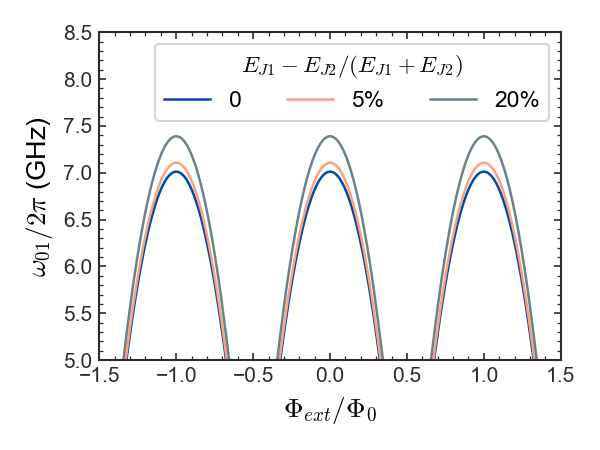

In [50]:
# Fitting Parameters
EC = 0.77
EJ0 = 5
FLUX_LIST = np.linspace(-1.5, 1.5, 201)

# Fitting
fitted = scq.TunableTransmon(
    EJmax=2*EJ0,
    EC=EC,
    d=0,       # no assymerty
    flux=0.0,  # defaults
    ng=0.0,
    ncut=21
)
a = fitted.get_spectrum_vs_paramvals(param_name='flux',
                                             param_vals=FLUX_LIST,
                                             evals_count=2,
                                             subtract_ground=True
                                             ).energy_table[:, 1]

EJ1 = 5
EJ2 = EJ1 * 1.05
fitted = scq.TunableTransmon(
    EJmax=EJ1 + EJ2,
    EC=EC,
    d=(EJ1-EJ2)/(EJ1+EJ2),       # no assymerty
    flux=0.0,  # defaults
    ng=0.0,
    ncut=21
)
b = fitted.get_spectrum_vs_paramvals(param_name='flux',
                                             param_vals=FLUX_LIST,
                                             evals_count=2,
                                             subtract_ground=True
                                             ).energy_table[:, 1]

EJ1 = 5
EJ2 = EJ1 * 1.2
fitted = scq.TunableTransmon(
    EJmax=EJ1 + EJ2,
    EC=EC,
    d=(EJ1-EJ2)/(EJ1+EJ2),       # no assymerty
    flux=0.0,  # defaults
    ng=0.0,
    ncut=21
)
c = fitted.get_spectrum_vs_paramvals(param_name='flux',
                                             param_vals=FLUX_LIST,
                                             evals_count=2,
                                             subtract_ground=True
                                             ).energy_table[:, 1]

# Plot
fig, ax = plt.subplots(1, 1, figsize=(4, 3))

ax.plot(FLUX_LIST, a,alpha=1, label="0", color="C0")
ax.plot(FLUX_LIST, b,label="5%",alpha=1, color="C6")
ax.plot(FLUX_LIST, c,label="20%",alpha=1, color="C7")
ax.set_xlabel("$\Phi_{ext}/\Phi_0$")
ax.set_ylabel("$\omega_{01}/2\pi$ (GHz)")

ax.legend(ncol=3, title="$E_{J1} - E_{J2}/(E_{J1}+E_{J2})$")
ax.set_ylim([5, 8.5])
ax.set_xlim([-1.5, 1.5])
plt.tight_layout()

# plt.savefig("./output/assymetric-transmon.pgf")
plt.savefig("./output/assymetric-transmon.svg")
# plt.savefig(FILENAME.replace("txt", "png"), dpi=300, transparent=True, bbox_inches='tight')
# plt.savefig(FILENAME.replace("txt", "svg"), dpi=300, transparent=True, bbox_inches='tight')